## Multiple Linear Regression
### Bike Sharing model for the prediction of demand for shared bikes

#### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.


<hr/>

#### Import the required library

In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualisations to understand the presence and distribution of missing data within a pandas dataframe
import missingno as msno

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Data understanding, preparation and EDA

In [447]:
# Import bike sharing dataset
bike_sharing_df = pd.read_csv('day.csv')

In [448]:
##### let's check Cardinality and Basic Information about the bike sharing dataset


# Number of rows and columns
print(f"Number of Rows: {bike_sharing_df.shape[0]}")
print(f"Number of Columns: {bike_sharing_df.shape[1]}")

# Number of missing values
print('Number of missing values: ', bike_sharing_df.isnull().sum().sum())

# Number of unique values
print('Number of unique values:', bike_sharing_df.nunique().sum())

# Number of duplicates
print('Number of duplicates:', bike_sharing_df.duplicated().sum())

print("\n\n")

print(f"Loan Data Types: \n{bike_sharing_df.dtypes}")
print("\n")

print(f"Loan Data Info: \n")
print(bike_sharing_df.info())
print("\n")


# Dataframe has 730 rows and 16 columns.
# Dataframe has 3 types datatypes int64, int64 and object
# Size of the file is 57.5+ KB

Number of Rows: 730
Number of Columns: 16
Number of missing values:  0
Number of unique values: 5900
Number of duplicates: 0



Loan Data Types: 
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


Loan Data Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    in

In [449]:
# Let's have a look of some loan records
bike_sharing_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Missing Value Treatments

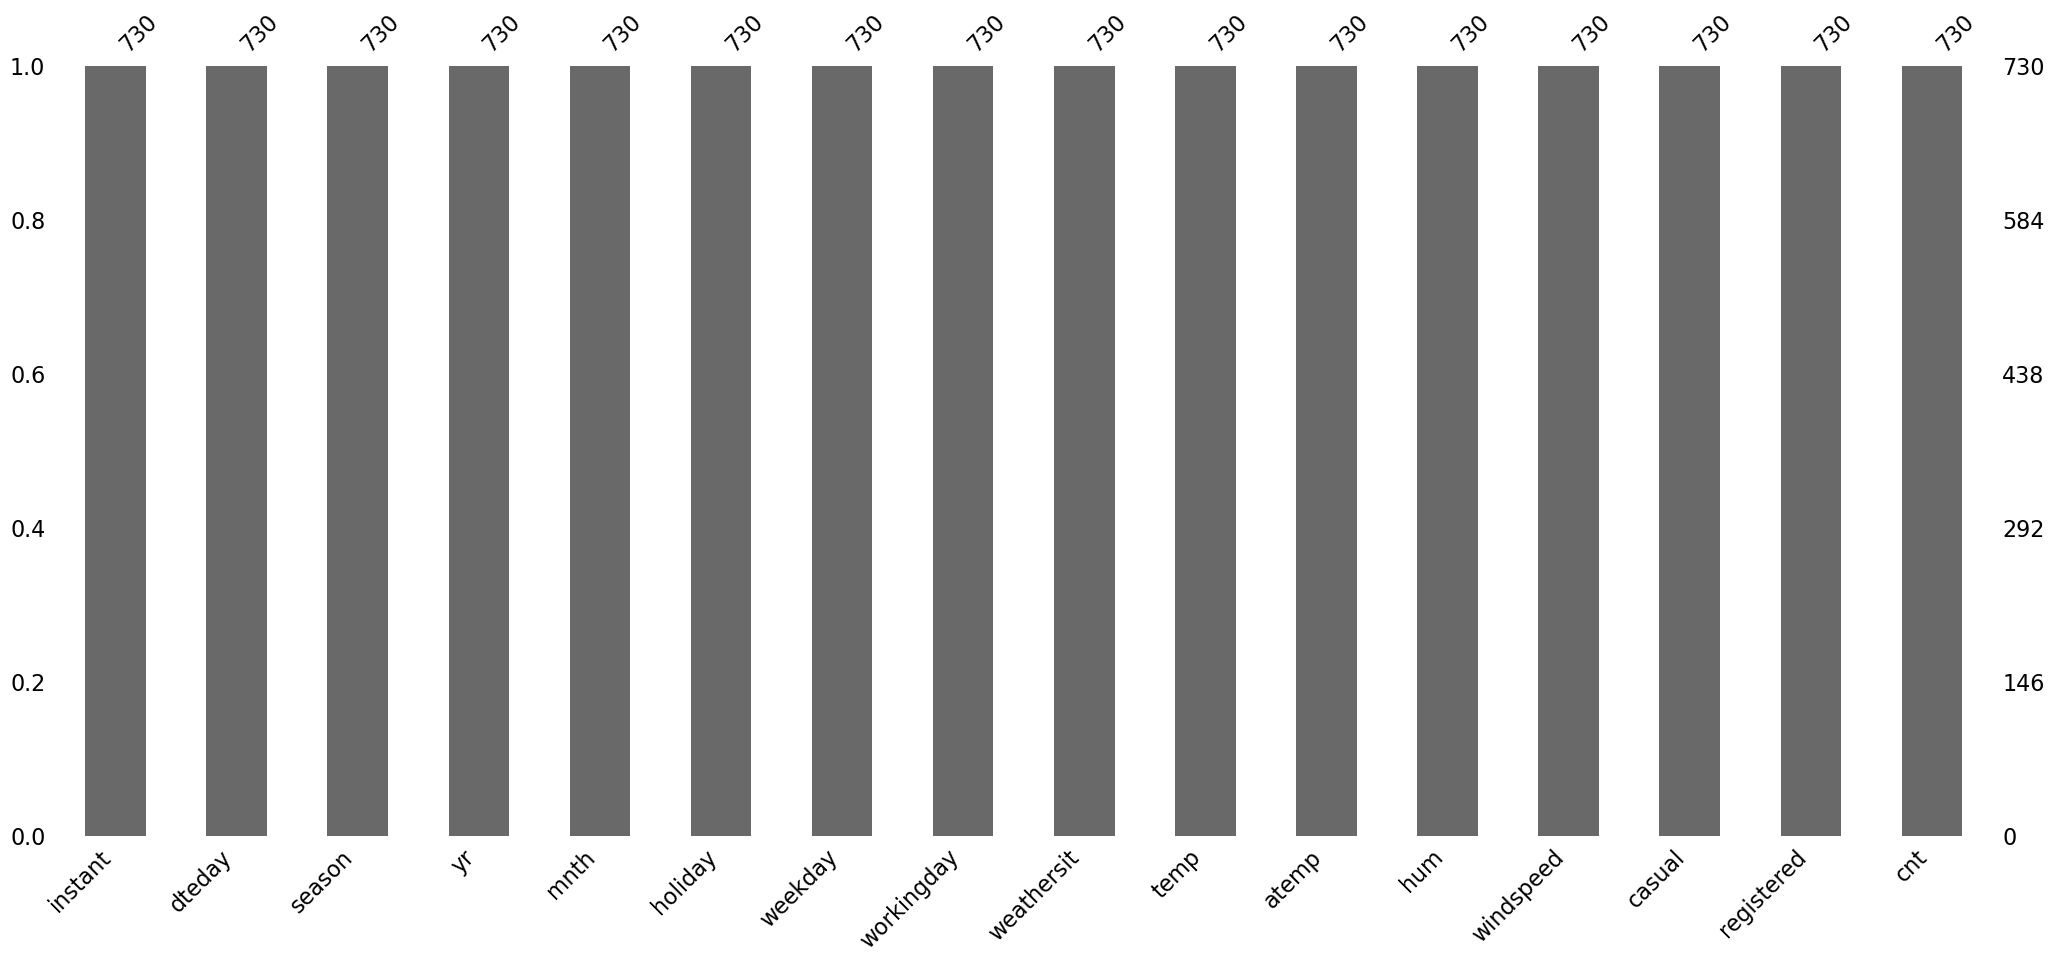

In [450]:
# let's visualise coluns missing values in chart using missingno
msno.bar(bike_sharing_df)
plt.show()

# No Missing values, all the columns has exactly 730 rows

#### Observation

No Missing values, all the columns has exactly 730 rows

In [451]:
# Let have a look on loan data stats
bike_sharing_df.describe().transpose()

# We can find the min, max, mean, IQR etc values for dataframe columns

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


#### Categorical value conversion


In [452]:
# category value to category mappings
season_category_mappings = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month_category_mappings = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
weekday_category_mappings = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4: 'Thursday', 5:'Friday', 6: 'Saturday'}
weathersit_category_mappings = {1: 'Clear, Few clouds, Partly cloudy, Partly cloudy', 2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist', 3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds', 4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

year_category_mappings = {0: 2018, 1:2019}

boolean_category_mappings = {1:'Yes', 0:'No'}

In [453]:
# Category column mappings
categorical_columns = ["season", "mnth", "weekday", "weathersit", "holiday", "workingday", "yr"]
categorical_mappings = {
    "season": season_category_mappings,
    "mnth": month_category_mappings,
    "weekday": weekday_category_mappings,
    "weathersit": weathersit_category_mappings,
    "holiday": boolean_category_mappings,
    "workingday": boolean_category_mappings,
    "yr": year_category_mappings
}

def category_mapping_callback(variable):
    mapping_dict = categorical_mappings[variable]
    def cat_mappings(x):
        return x.map(mapping_dict)
    
    return cat_mappings


In [454]:

# Convertto Categorical Value
for column in categorical_columns:
    # Print Unique Values
    print(f"*** Before Transforming Column - {column} *** \n")
    print(f"Unique Values Before Transformation - {bike_sharing_df[column].unique()}")
    
    # Transform category value
    bike_sharing_df[[column]] = bike_sharing_df[[column]].apply(category_mapping_callback(column))
    
    print(f"Unique Values After Transformation - {bike_sharing_df[column].unique()}")
    print("Column wise unique value counts - ")
    print(bike_sharing_df[column].value_counts())
    print(f"Transforming Complete for Column - {column}")
    print("*********************************************\n\n")


*** Before Transforming Column - season *** 

Unique Values Before Transformation - [1 2 3 4]
Unique Values After Transformation - ['spring' 'summer' 'fall' 'winter']
Column wise unique value counts - 
fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
Transforming Complete for Column - season
*********************************************


*** Before Transforming Column - mnth *** 

Unique Values Before Transformation - [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Values After Transformation - ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Column wise unique value counts - 
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: mnth, dtype: int64
Transforming Complete for Column - mnth
*********************************************


*** Before Transforming Column - weekday *** 

Unique Values Before Transformation - [6 0 1 2 3 4 5]
Unique Values After Trans

In [455]:
# Read sample records after Transformation
bike_sharing_df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801


In [456]:
# bike sharing dataframe columns
print(bike_sharing_df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [457]:
# Rename Column Names as per the context
bike_sharing_df.columns = [
    'instant', 
    'dteday', 
    'Season', 
    'Year', 
    'Month', 
    'Holiday', 
    'Weekday',
    'WorkingDay', 
    'WeatherSituation', 
    'Temperature', 
    'FeelingTemperature', 
    'Humidity', 
    'WindSpeed',
    'CasualCount', 
    'RegisteredCount', 
    'Count'
]

print(bike_sharing_df.columns)

Index(['instant', 'dteday', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'WorkingDay', 'WeatherSituation', 'Temperature', 'FeelingTemperature',
       'Humidity', 'WindSpeed', 'CasualCount', 'RegisteredCount', 'Count'],
      dtype='object')


In [458]:
# Read sample records after Column Renaming
bike_sharing_df.head(2)

,instant,dteday,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSituation,Temperature,FeelingTemperature,Humidity,WindSpeed,CasualCount,RegisteredCount,Count
0,1,01-01-2018,spring,2018,Jan,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801


In [459]:
# Columns Data type conversion.
# Convert dteday to date instance
bike_sharing_df["dteday"] = pd.to_datetime(bike_sharing_df['dteday'])
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant             730 non-null    int64         
 1   dteday              730 non-null    datetime64[ns]
 2   Season              730 non-null    object        
 3   Year                730 non-null    int64         
 4   Month               730 non-null    object        
 5   Holiday             730 non-null    object        
 6   Weekday             730 non-null    object        
 7   WorkingDay          730 non-null    object        
 8   WeatherSituation    730 non-null    object        
 9   Temperature         730 non-null    float64       
 10  FeelingTemperature  730 non-null    float64       
 11  Humidity            730 non-null    float64       
 12  WindSpeed           730 non-null    float64       
 13  CasualCount         730 non-null    int64         

In [460]:
# Instant column unique values check
unique_values = bike_sharing_df["instant"].unique().size
print(f"Unique values - {unique_values}")
# The instant has all unique values, we can drop the column

Unique values - 730


In [461]:
# Drop colums which are not required for analysis
columns_to_drop = ["instant", "dteday"]
print(f"Shape before dropping {bike_sharing_df.shape}")
bike_sharing_df.drop(columns=columns_to_drop, inplace=True)
print(f"Shape after dropping {bike_sharing_df.shape}")

Shape before dropping (730, 16)
Shape after dropping (730, 14)


In [462]:
bike_sharing_df.head(2)

,Season,Year,Month,Holiday,Weekday,WorkingDay,WeatherSituation,Temperature,FeelingTemperature,Humidity,WindSpeed,CasualCount,RegisteredCount,Count
0,spring,2018,Jan,No,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,No,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",14.902598,17.68695,69.6087,16.652113,131,670,801


In [463]:
# Print info about the dataframe
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              730 non-null    object 
 1   Year                730 non-null    int64  
 2   Month               730 non-null    object 
 3   Holiday             730 non-null    object 
 4   Weekday             730 non-null    object 
 5   WorkingDay          730 non-null    object 
 6   WeatherSituation    730 non-null    object 
 7   Temperature         730 non-null    float64
 8   FeelingTemperature  730 non-null    float64
 9   Humidity            730 non-null    float64
 10  WindSpeed           730 non-null    float64
 11  CasualCount         730 non-null    int64  
 12  RegisteredCount     730 non-null    int64  
 13  Count               730 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 80.0+ KB


In [464]:
### Data 

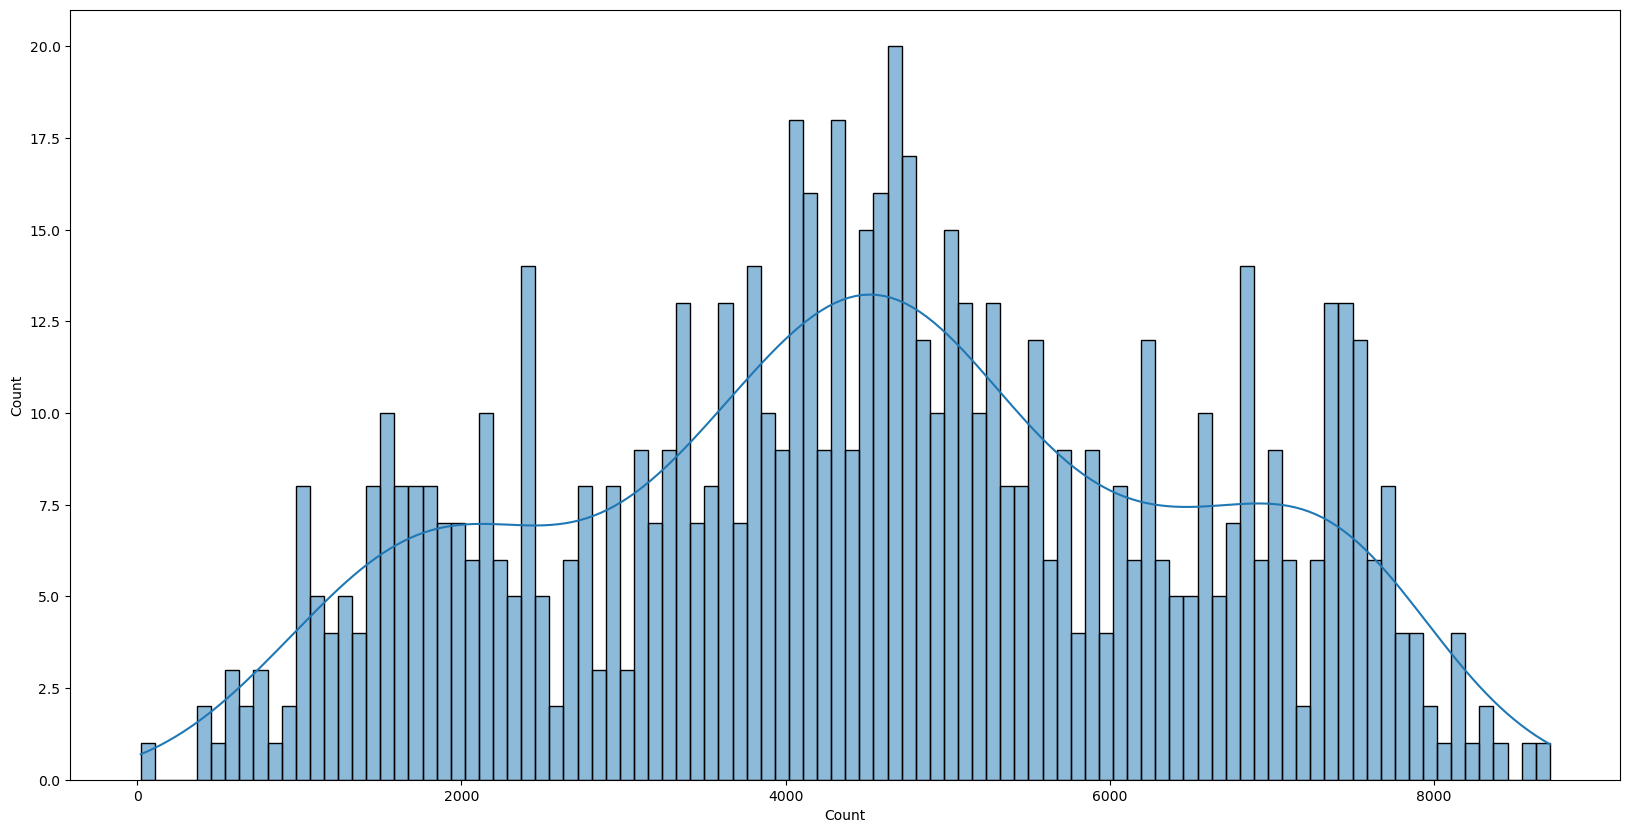

In [465]:
# let's see how much amount is funded by investor againest applied loan amount
plt.figure(figsize=(20, 10))
sns.histplot(bike_sharing_df, x="Count", bins=100, kde=True)
plt.show()
# As we can see from graph, majority of the Bike Shared Countare  us applied around 3.5k to 5.5k
# Some highfrequency observed between on 7,000 to 8,000

['No', 'Yes']


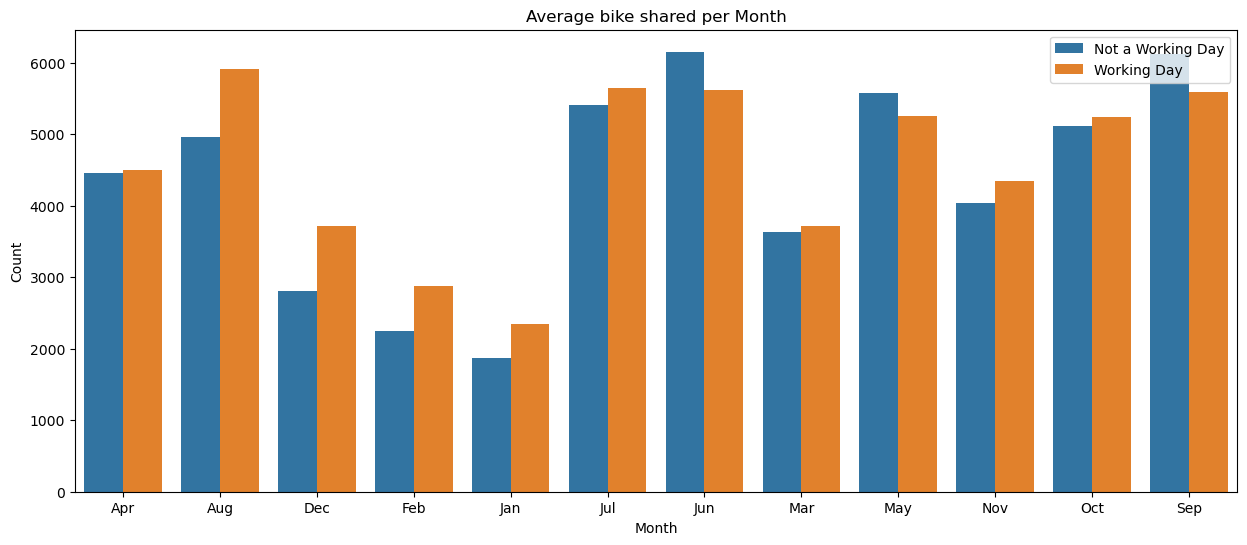

In [466]:
# Average Monthly Count Distribution plot
f, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

monthly_aggr = pd.DataFrame(bike_sharing_df.groupby(['Month', 'WorkingDay'])['Count'].mean()).reset_index()
sns.barplot(data=monthly_aggr, x='Month', y='Count', hue='WorkingDay', ax=axes)
axes.set(xlabel='Month', ylabel='Count', title='Average bike shared per Month')
handles, _ = axes.get_legend_handles_labels()
print(_)
axes.legend(handles, ['Not a Working Day', 'Working Day'])
plt.show()

### Distribution vs. Weather, Season, Working Day


Let us see how 'Count' = number of bikes shared varies across the various categorical data (Season, Month, Holiday, Weekday, WorkingDay)

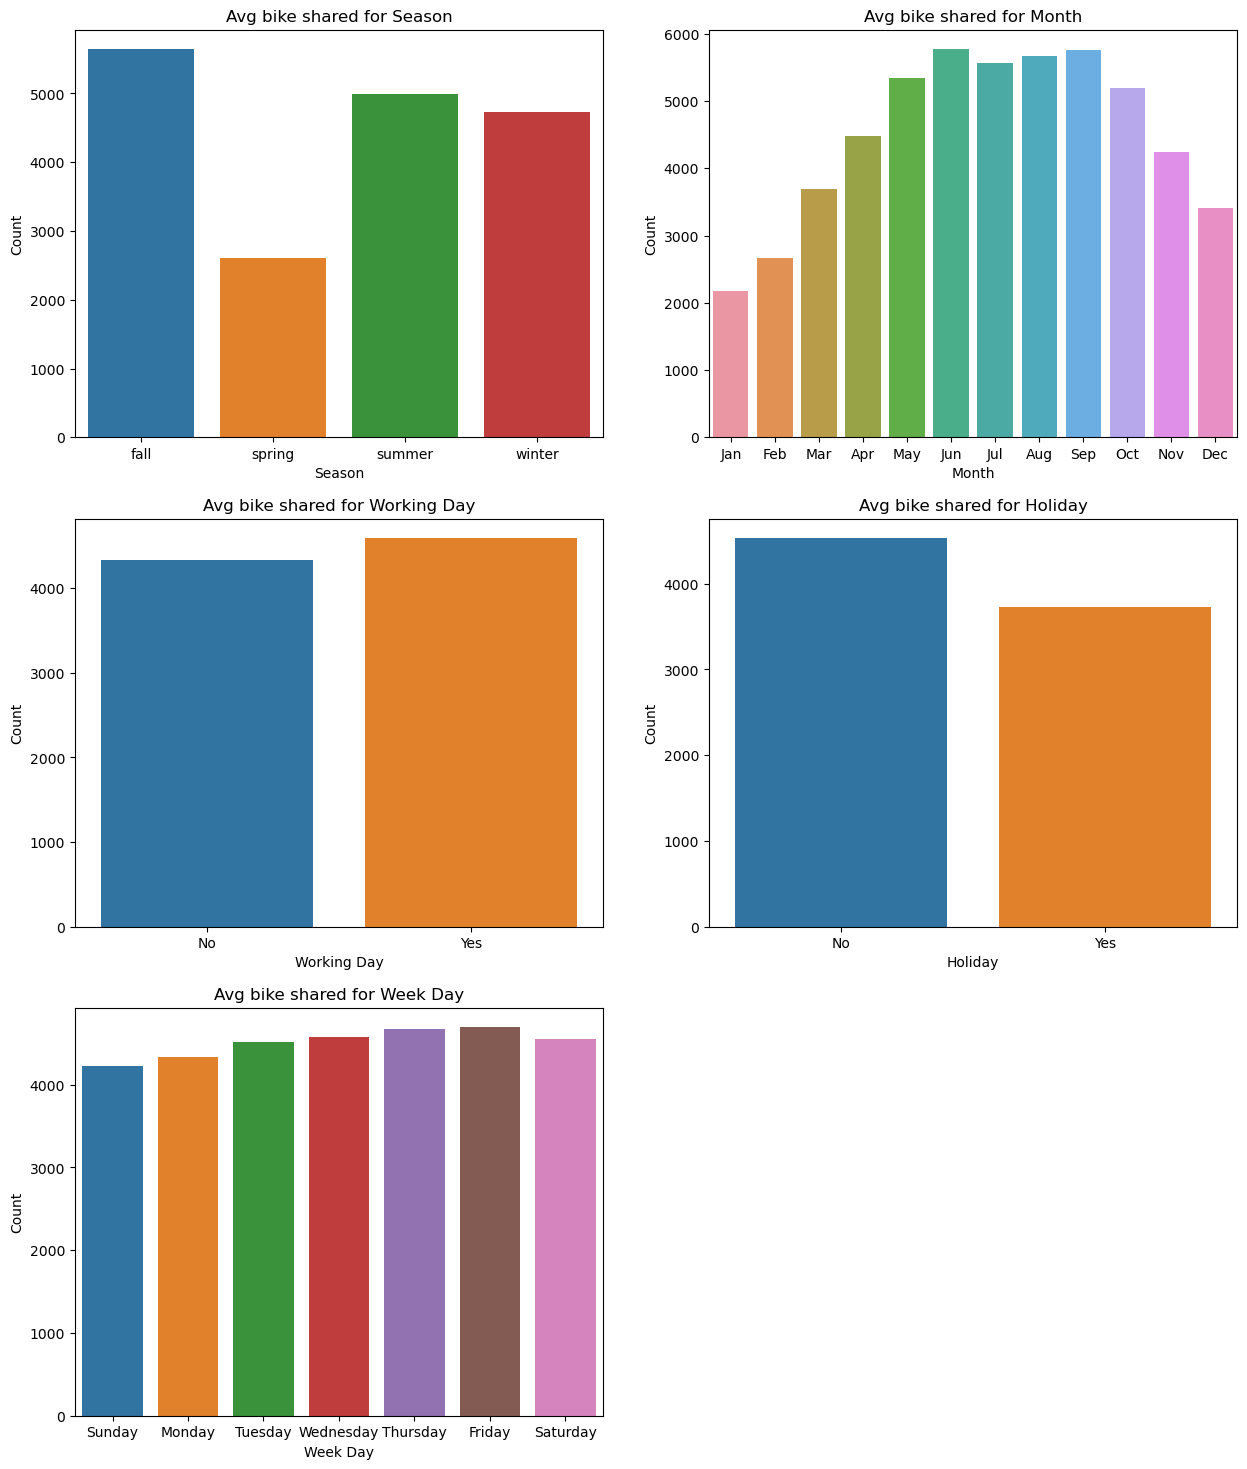

In [467]:
# Average values across each of the categorical columns 

month_order = month_category_mappings.values()
weekday_order = weekday_category_mappings.values()

fig = plt.figure(figsize=(15, 18))

axes = fig.add_subplot(3, 2, 1)
group_season = pd.DataFrame(bike_sharing_df.groupby(['Season'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Season', y='Count', ax=axes)
axes.set(xlabel='Season', ylabel='Count', title='Avg bike shared for Season')

axes = fig.add_subplot(3, 2, 2)
group_mnth = pd.DataFrame(bike_sharing_df.groupby(['Month'])['Count'].mean()).reset_index()
sns.barplot(data=group_mnth, x='Month', y='Count', ax=axes, order=month_order)
axes.set(xlabel='Month', ylabel='Count', title='Avg bike shared for Month')

axes = fig.add_subplot(3, 2, 3)
group_workingday = pd.DataFrame(bike_sharing_df.groupby(['WorkingDay'])['Count'].mean()).reset_index()
sns.barplot(data=group_workingday, x='WorkingDay', y='Count', ax=axes)
axes.set(xlabel='Working Day', ylabel='Count', title='Avg bike shared for Working Day')

axes = fig.add_subplot(3, 2, 4)
group_season = pd.DataFrame(bike_sharing_df.groupby(['Holiday'])['Count'].mean()).reset_index()
sns.barplot(data=group_season, x='Holiday', y='Count', ax=axes)
axes.set(xlabel='Holiday', ylabel='Count', title='Avg bike shared for Holiday')

axes = fig.add_subplot(3, 2, 5)
group_weekday = pd.DataFrame(bike_sharing_df.groupby(['Weekday'])['Count'].mean()).reset_index()
sns.barplot(data=group_weekday, x='Weekday', y='Count', ax=axes, order=weekday_order)
axes.set(xlabel='Week Day', ylabel='Count', title='Avg bike shared for Week Day')
plt.show()

#### Outlier detection

Boxplots to get an idea of the distribution and outliers acorss various features

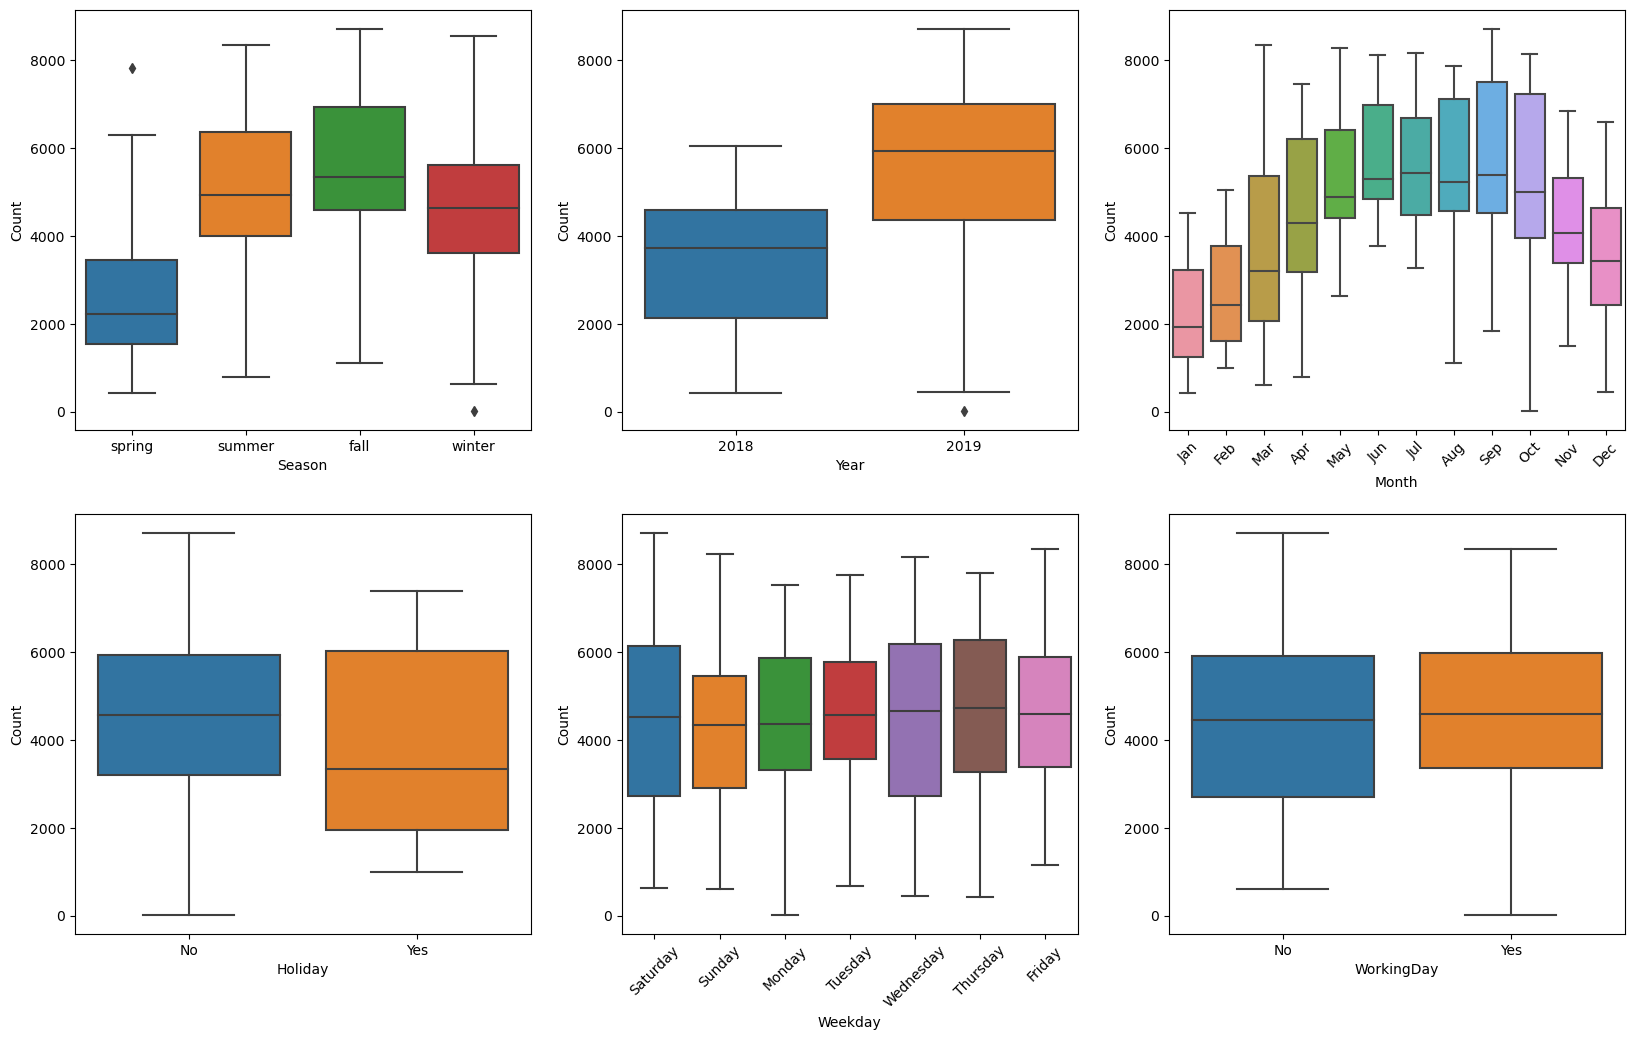

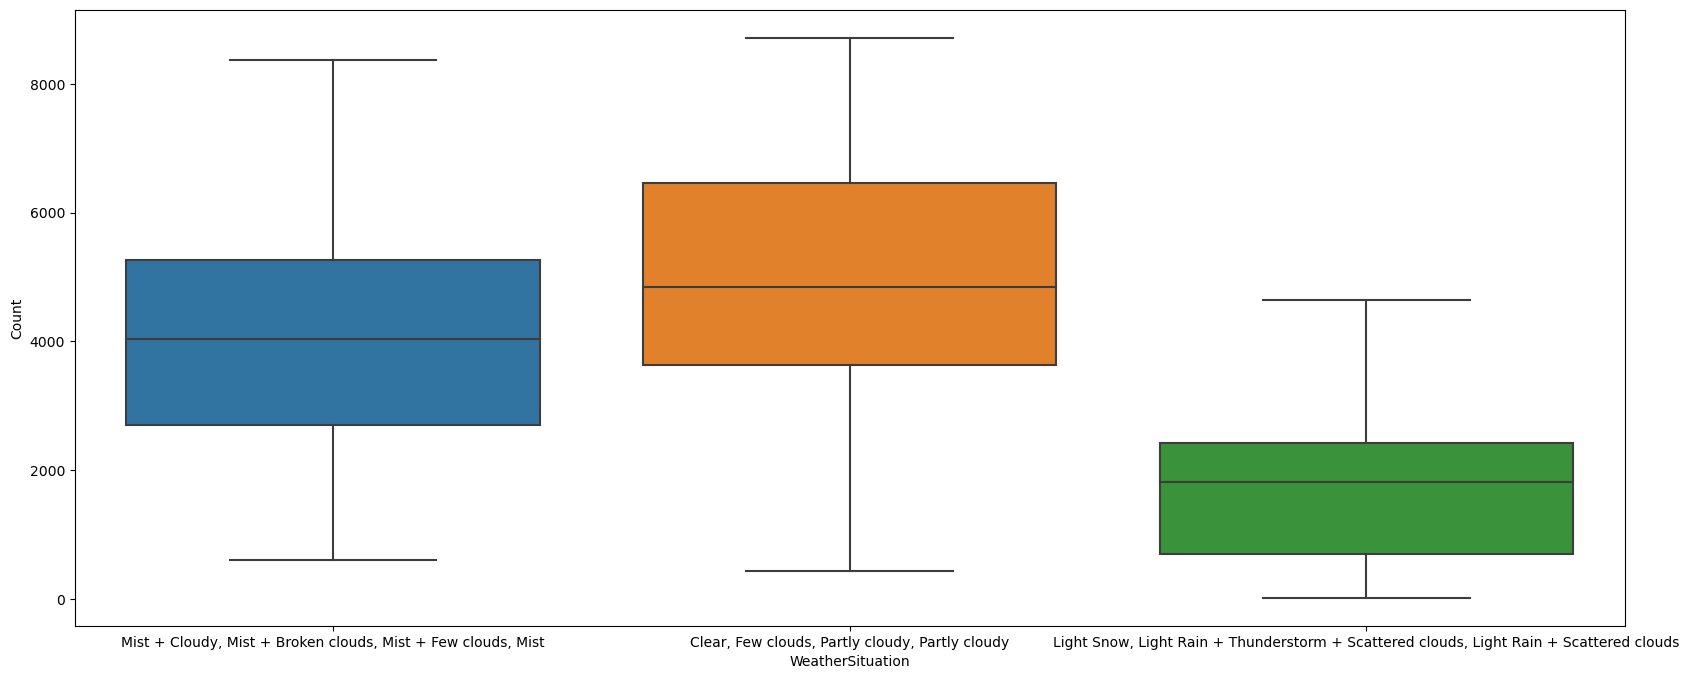

In [468]:
# Seaborn boxplots to get an idea of the distribution/outliers
plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x='Season', y='Count', data=bike_sharing_df)

plt.subplot(2,3,2)
sns.boxplot(x='Year', y='Count', data=bike_sharing_df)

plt.subplot(2,3,3)
plt.xticks(rotation=45)
sns.boxplot(x='Month', y='Count', data=bike_sharing_df)

plt.subplot(2,3,4)
sns.boxplot(x='Holiday', y='Count', data=bike_sharing_df)

plt.subplot(2,3,5)
plt.xticks(rotation=45)
sns.boxplot(x='Weekday', y='Count', data=bike_sharing_df)

plt.subplot(2,3,6)
sns.boxplot(x='WorkingDay', y='Count', data=bike_sharing_df)

plt.figure(figsize=(20, 8))
plt.subplot(1,1,1)
sns.boxplot(x='WeatherSituation', y='Count', data=bike_sharing_df)

plt.show()

#### Observations

- Demand is low in `spring` and high in `fall` season
- Demand was high in `2019` and low in `2018`
- Demand was high in month of `August, Sepember, Octocer` and low in `Januray`
- Working day has high demand
- Day wise we don't see much change on demand
- Workingdays wise we don't see much change on demand
- Weather Situation 
    -   High demand with - "Clear, Few clouds, Partly cloudy, Partly cloudy" 
    -   low demand with "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"
- Month
    - Demand is high for the month from May to October

In [469]:
bike_sharing_df.columns

Index(['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'WorkingDay',
       'WeatherSituation', 'Temperature', 'FeelingTemperature', 'Humidity',
       'WindSpeed', 'CasualCount', 'RegisteredCount', 'Count'],
      dtype='object')

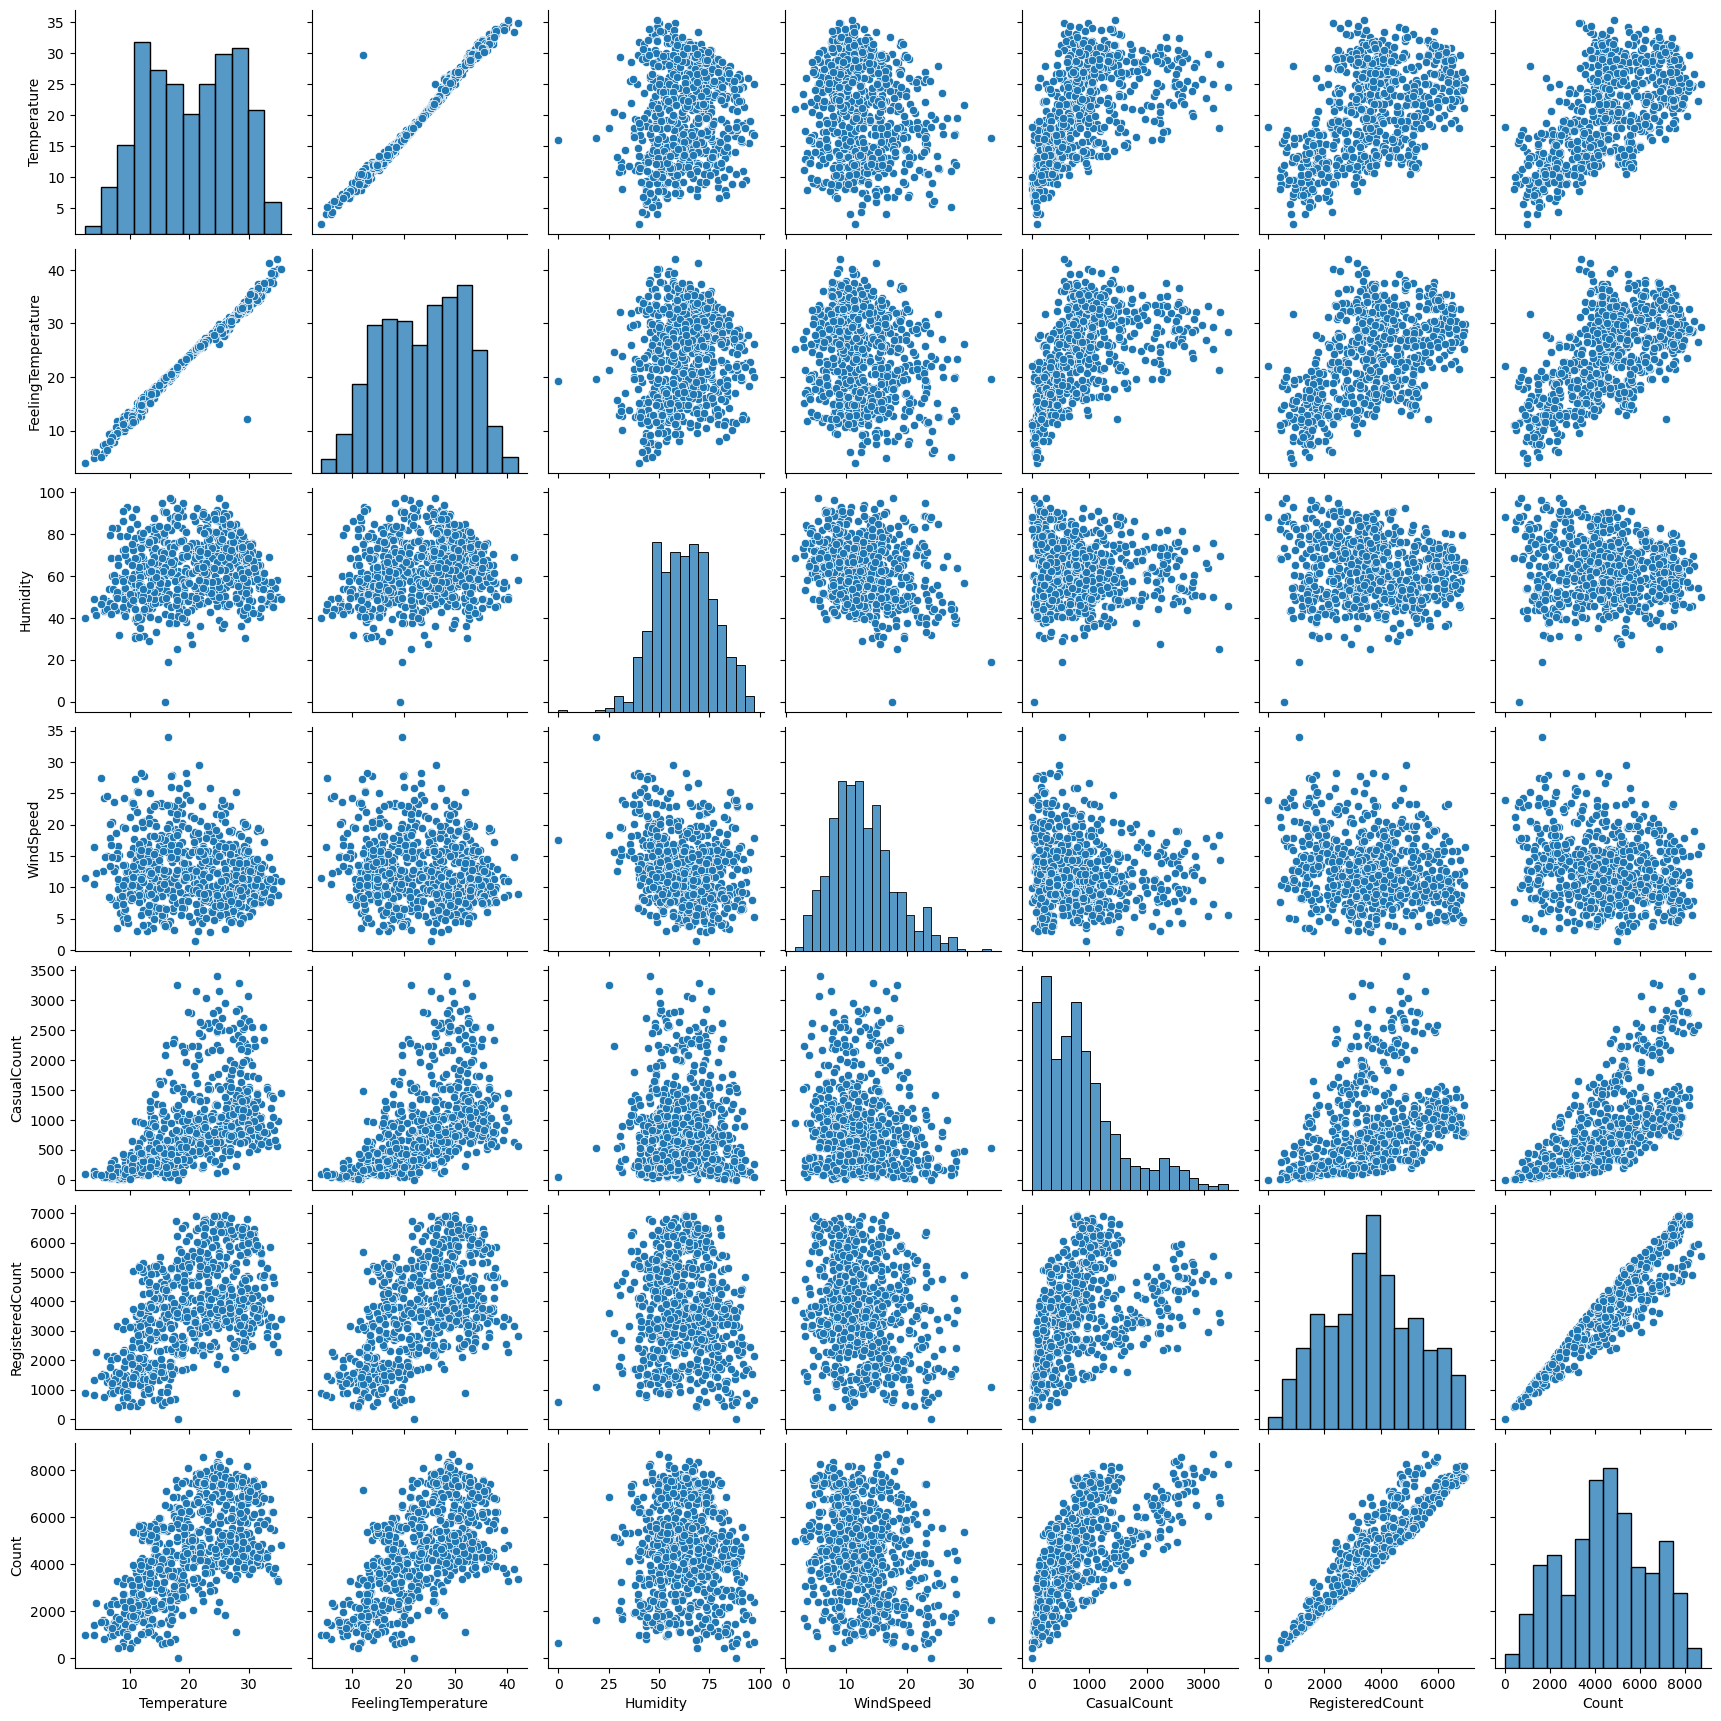

In [470]:
pairplot_columns = ["Temperature", "FeelingTemperature", "Humidity", 'WindSpeed', 'CasualCount', 'RegisteredCount', 'Count']
sns.pairplot(bike_sharing_df[pairplot_columns])
plt.show()

##### Observations
Below are some of the observations

1. `Tempature` and `Feeling Temprature` shows a linear trends
2. `Count` and `Registered Users` shows a linear trends

<Figure size 1000x1000 with 0 Axes>

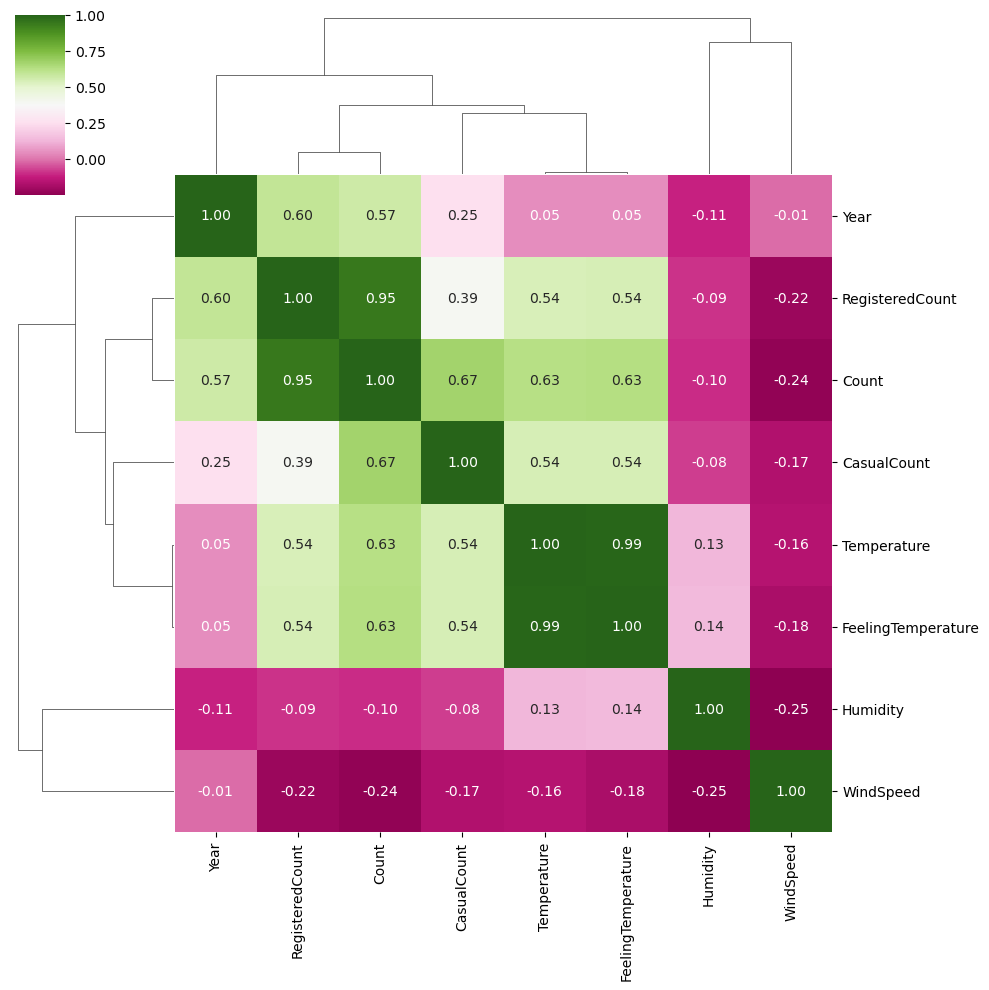

In [471]:
# checking correlation among different numerical variables using clustered heat map

plt.figure(figsize=(10,10))
sns.clustermap(bike_sharing_df.corr(), cmap='PiYG', annot=True, fmt=".2f")
plt.show()

##### Observations
Below are some of the observations

1. `Season` and `Month` shows a strong positive correlation, this makes sense as in general couple of months are combined to make a season.
2. `Temperature` and `FeelingTemperature` shows a strong positive correlation, this means with increase in temprature the feeling temprature will increase and vice-versa.
3. `RegisteredCount` and `Count` shows a strong positive correlation, this means the counts will increase if registered count increases and vice-versa.
4. `CasualCount` and `Count` shows a good positive correlation, this makes sence as count will increase if casual count increases and vice-versa.
5. `CasualCount`, `Temperature`, `FeelingTemperature` shows a good positive correlation, this shows a intesting pattern as casual count increases with increase in temp or atemp.
6. `Year`, `Count`, `RegisteredCount` shows a good positive correlation, this shows with year counr and registered count also getting increased.
7. `weathersit`, `hum` shows a good positive correlation.
8. `casual`, `workingday` shows a strong negative correlation, it means casual bike sharing is less on working days.
9. `WeatherSituation` shows a negative correlation with `RegisteredCount` and `Count`, if weather is not good then it will impact the overall count on bike sharing.
10. `WindSpeed` shows a negative correlation with `Count` and `RegisteredCount`. It shows if windspeed is more then peoples are not preferring bike more.
11. `Season` shows a positive corellation with `RegisteredCount` and `Count`.

In [472]:
# As CasualCount, RegisteredCount, FeelingTemperature is highly collinear with Count, we can drop these columns for further analysis

bike_sharing_df.drop(columns=["CasualCount", "RegisteredCount", "FeelingTemperature"], axis=1, inplace=True)
print(f"After Dropping columns, shape = {bike_sharing_df.shape}")

After Dropping columns, shape = (730, 11)


<Figure size 1000x1000 with 0 Axes>

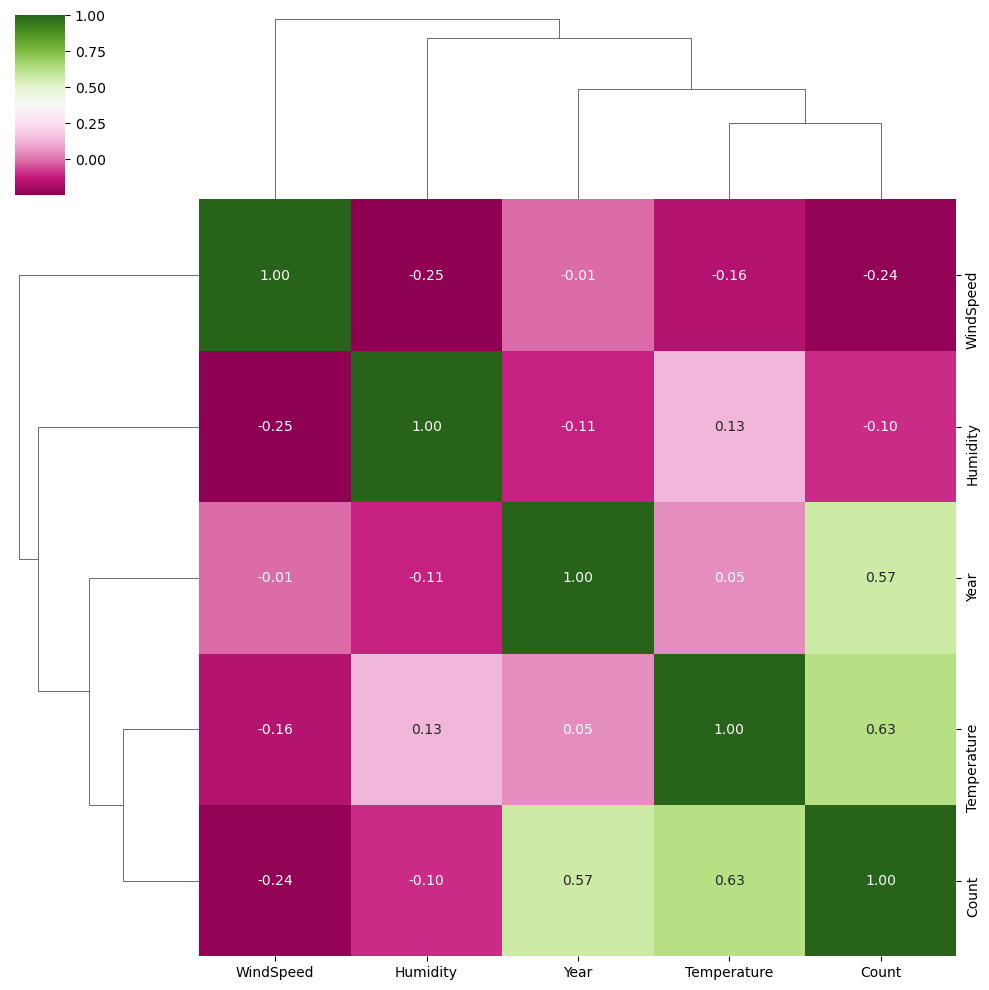

In [473]:
# Visualizing, checking correlation among different numerical variables using clustered heat map

plt.figure(figsize=(10,10))
sns.clustermap(bike_sharing_df.corr(), cmap='PiYG', annot=True, fmt=".2f")
plt.show()

### Creating Dummy variables

Now, we can drop one columns from dummy, as we need we need n-1 columns to represent a feature

In [474]:
# Creatiing dummy varaible for season
dummy_columns_list = ["Season", "Month", "Weekday", "WeatherSituation"]

# Create the dummies for the above columns
dummies = pd.get_dummies(bike_sharing_df[dummy_columns_list], drop_first=True)

# Concatnate the dummies with original dataset
bike_sharing_df = pd.concat([bike_sharing_df, dummies], axis=1)

# Drop the original columns after creating dummies
print(f"Before Dropping columns, shape = {bike_sharing_df.shape}")
bike_sharing_df.drop(columns=dummy_columns_list, axis=1, inplace=True)
print(f"After Dropping columns, shape = {bike_sharing_df.shape}")
print("Columns = ")
print(bike_sharing_df.columns)


Before Dropping columns, shape = (730, 33)
After Dropping columns, shape = (730, 29)
Columns = 
Index(['Year', 'Holiday', 'WorkingDay', 'Temperature', 'Humidity', 'WindSpeed',
       'Count', 'Season_spring', 'Season_summer', 'Season_winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Weekday_Monday', 'Weekday_Saturday', 'Weekday_Sunday',
       'Weekday_Thursday', 'Weekday_Tuesday', 'Weekday_Wednesday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')


In [475]:
# Lets view 2 samples rows from the dataframe
bike_sharing_df.head(2)

,Year,Holiday,WorkingDay,Temperature,Humidity,WindSpeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
0,2018,No,No,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,No,No,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [476]:
# Convert Holiday, WorkingDay to Binary as we converted to Yes/No Categorical
boolean_inv_map = {"No": 0, "Yes": 1}
bike_sharing_df["Holiday"] = bike_sharing_df["Holiday"].map(boolean_inv_map)
bike_sharing_df["WorkingDay"] = bike_sharing_df["WorkingDay"].map(boolean_inv_map)

# Convert Year to binary values
# bike_sharing_df["Year"] = bike_sharing_df["Year"].map({2018: 0, 2019: 1})

In [477]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                    --------------  -----  
 0   Year                                                                                                      730 non-null    int64  
 1   Holiday                                                                                                   730 non-null    int64  
 2   WorkingDay                                                                                                730 non-null    int64  
 3   Temperature                                                                                               730 non-null    float64
 4   Humidity                                                                        

## Model building and Evaluation 

### Train, Test Split
As we know, the first basic step for regression is performing a train-test split.

In [478]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# As our data set has 730 records, we are taking 70% of the records for the model training and 30% for testing the model
df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

# Check the shape of train and test set
print(f"Shape of Train set - {df_train.shape}")
print(f"Shape of Test set - {df_test.shape}")

Shape of Train set - (510, 29)
Shape of Test set - (219, 29)


In [479]:
# Let's see the data of train data set

df_train.head(2)

,Year,Holiday,WorkingDay,Temperature,Humidity,WindSpeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
653,2019,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,2019,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [480]:
# Let's see the data of test data set

df_test.head(2)

,Year,Holiday,WorkingDay,Temperature,Humidity,WindSpeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,2018,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,2019,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the Features
As scaling doesn't impact our model. Here we can see that  `Temperature, FeelingTemperature, Humidity, WindSpeed, CasualCount (users), RegisteredCount (users), Count` are not yet scaled. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.

For our case we will use `Min-Max scaling`, as it will take care of outliers.


In [481]:
# Create a instance of MinMaxScaler
scaler = MinMaxScaler()

In [482]:
# Apply scaler() to all the columns except theose contains 0 or 1

# Find the columns those does not have 0 or 1 value
columns_to_scale = bike_sharing_df.loc[:, (~bike_sharing_df.isin([0,1]).all())].columns
print(f"Columns to scale = {columns_to_scale}")

features_to_scale = list(columns_to_scale)

df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])

# fit() - learns xmin and xmax
# transform() - computes (x-xmin)/(xmax-xmin)
# fit_transform() - does the both fit and transform

Columns to scale = Index(['Year', 'Temperature', 'Humidity', 'WindSpeed', 'Count'], dtype='object')


In [483]:
# Let's describe the train dataframe after scaling
df_train.describe()

,Year,Holiday,WorkingDay,Temperature,Humidity,WindSpeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


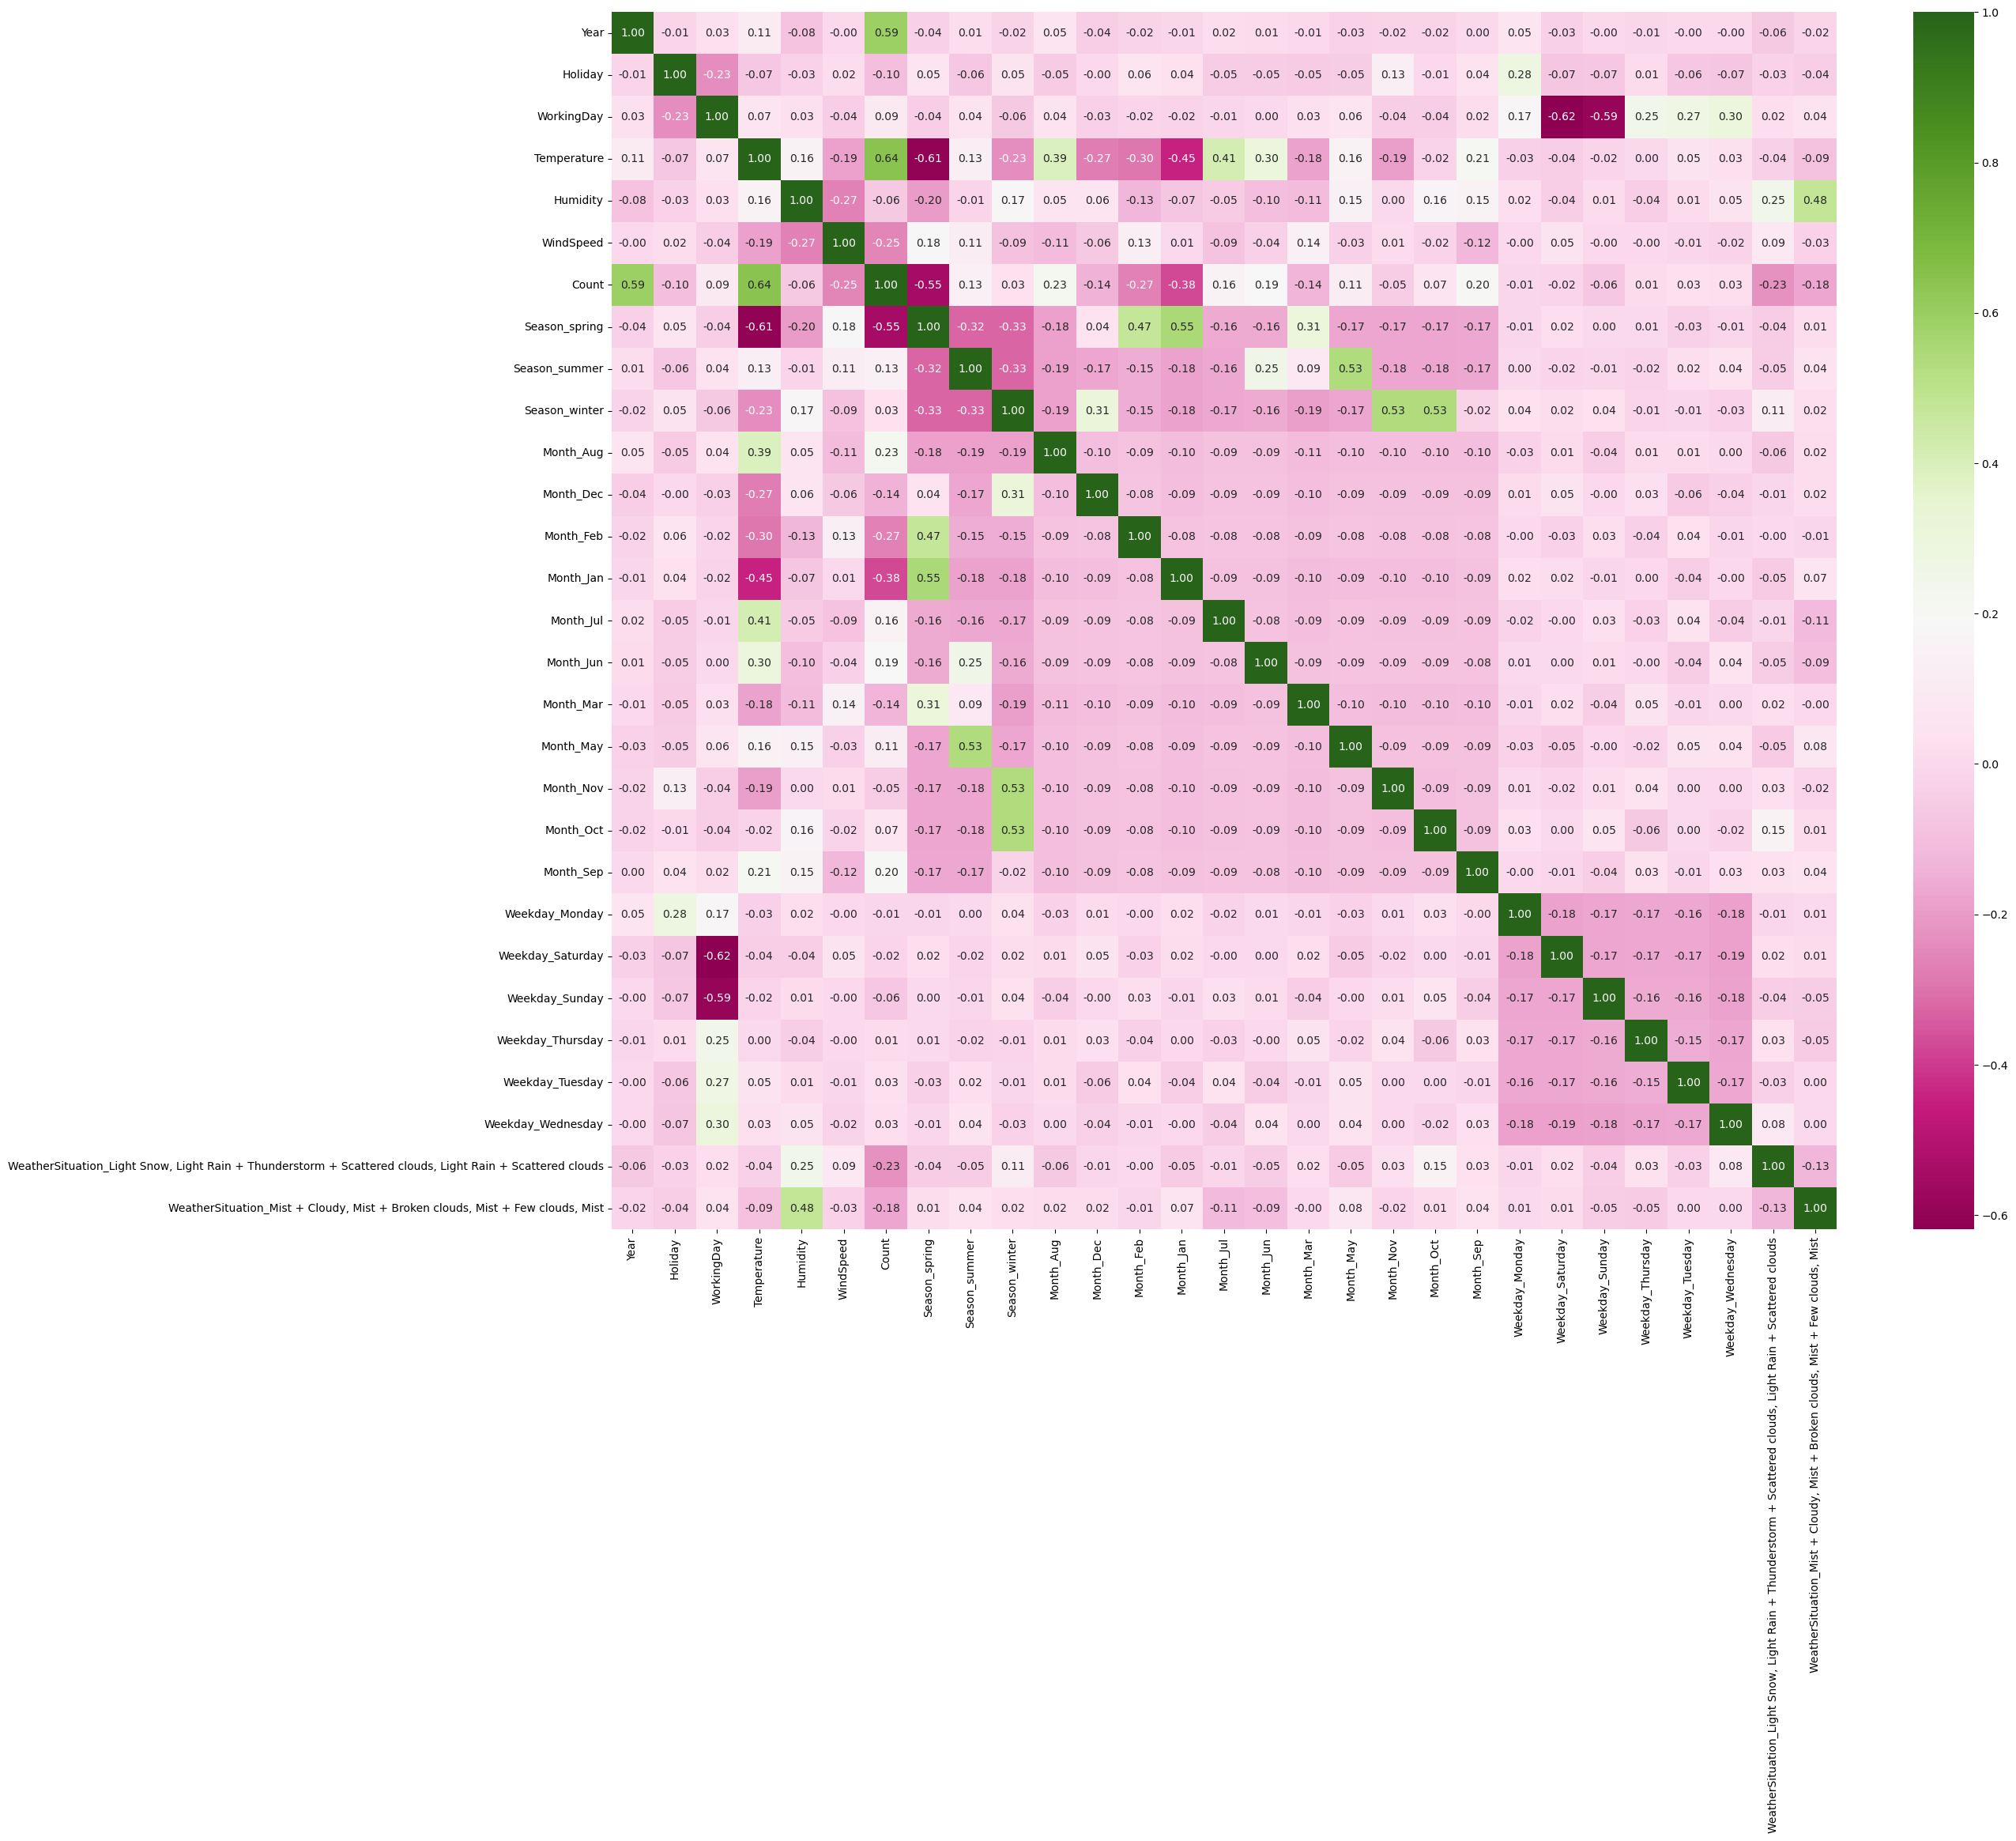

In [484]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), cmap='PiYG', annot=True, fmt=".2f")
plt.show()

#### Observattion
- Year is positively corelated with Count
- Saturday and Sunday are negatively corellated with "WorkingDay"

As we noticed, RegisteredCount seems to the correlated to Count the most. Let's see a scatter plot for RegisteredCount vs Count.

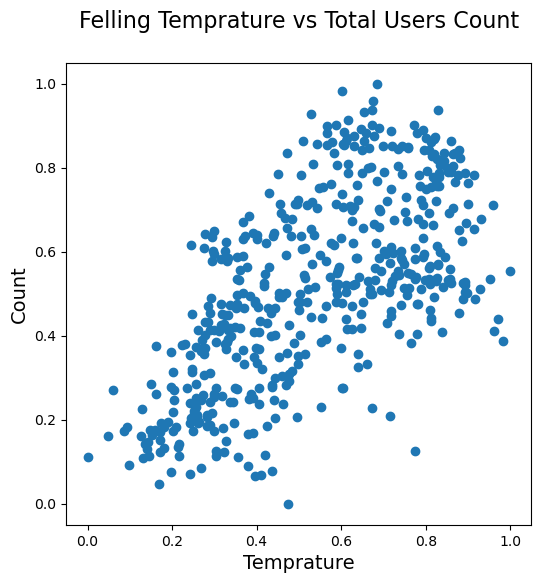

In [485]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.Temperature, df_train.Count)
plt.title('Felling Temprature vs Total Users Count\n', fontsize = 16) # Plot heading 
plt.xlabel('Temprature', fontsize = 14)  
plt.ylabel('Count', fontsize = 14) 
plt.show()

#### Dividing into X and Y sets for the model building

In [486]:
y_train = df_train.pop('Count')
X_train = df_train

print(f"Shape of y_traint - {y_train.shape}")
print(f"Shape of X_train - {X_train.shape}")

Shape of y_traint - (510,)
Shape of X_train - (510, 28)


### Building a linear model

As we know there are three way to start with -

-   Forward approach                        - start with one variable and keep adding
-   Backward approach                       - Add all the variables and remove one by one
-   RFE - Recursive feature elimination     - Select the variable based on significance


As we have 34 variable in the dataset, so we can go with reculsive way to feature elemination, so that our model will pick the top  n features. So let's use `RFE` to select the significant variables.

In [488]:
# Running RFE with the output number of the variable equal to 15

# Create object of lm
lm = LinearRegression()

# Fit x_train and y_train to lm object
lm.fit(X_train, y_train)


# running RFE
rfe = RFE(lm, n_features_to_select=17)
rfe = rfe.fit(X_train, y_train)

In [489]:
# Get Top Features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('WorkingDay', True, 1),
 ('Temperature', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Month_Aug', False, 4),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 11),
 ('Month_Mar', False, 12),
 ('Month_May', False, 3),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 8),
 ('Month_Sep', True, 1),
 ('Weekday_Monday', False, 6),
 ('Weekday_Saturday', True, 1),
 ('Weekday_Sunday', False, 5),
 ('Weekday_Thursday', False, 9),
 ('Weekday_Tuesday', False, 7),
 ('Weekday_Wednesday', False, 10),
 ('WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
  True,
  1),
 ('WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
  True,
  1)]

In [490]:
# Let's check the list of columns which are significant
col = X_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'WorkingDay', 'Temperature', 'Humidity', 'WindSpeed',
       'Season_spring', 'Season_summer', 'Season_winter', 'Month_Dec',
       'Month_Jan', 'Month_Jul', 'Month_Nov', 'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [491]:
# Let's check the list of columns which are insignificant
X_train.columns[~rfe.support_]

Index(['Month_Aug', 'Month_Feb', 'Month_Jun', 'Month_Mar', 'Month_May',
       'Month_Oct', 'Weekday_Monday', 'Weekday_Sunday', 'Weekday_Thursday',
       'Weekday_Tuesday', 'Weekday_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

#### MODEL 1

Features taken from the RFE

In [492]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [493]:
# Adding a constant variable to the x train dataset
X_train_sm = sm.add_constant(X_train_rfe)

In [494]:
lm = sm.OLS(y_train, X_train_sm).fit()   # Running the linear model

# let's check the parameters of lm
lm.params

const                                                                                                       0.275916
Year                                                                                                        0.230782
Holiday                                                                                                    -0.052019
WorkingDay                                                                                                  0.044539
Temperature                                                                                                 0.474953
Humidity                                                                                                   -0.147398
WindSpeed                                                                                                  -0.187593
Season_spring                                                                                              -0.061136
Season_summer                                                   

In [495]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          9.55e-191
Time:                        22:00:28   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Observation :

R-squared is high and good for prediction
p-value close to 0 is good for prediction
F-statistic is high
Prob (F-statistic) is ~0 is good
Looking at the p-values, it looks like some of the variables (`Holiday`) is insignificant.

We could simply drop the variable with the high p value.

A better way would be to supplement this with the VIF information.

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

In [496]:

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,31.16
3,Temperature,19.14
2,WorkingDay,5.37
5,WindSpeed,4.78
6,Season_spring,4.57
8,Season_winter,4.12
7,Season_summer,2.87
16,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",2.32
0,Year,2.09
14,Weekday_Saturday,2.00


In [497]:
X_train_rfe.columns

Index(['Year', 'Holiday', 'WorkingDay', 'Temperature', 'Humidity', 'WindSpeed',
       'Season_spring', 'Season_summer', 'Season_winter', 'Month_Dec',
       'Month_Jan', 'Month_Jul', 'Month_Nov', 'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model
See from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, Holiday as it has high p-value. Let's go ahead and drop this variables

#### Drop criteria:

High p-value and high VIF

High-low :

 > i) High P, Low VIF - Drop this first<br>
 > ii) Low P-Value, High VIF - Drop this after above

Low p and low VIF

In [498]:
# Drop Holiday as it has high p-value
X_train_new = X_train_rfe.drop(["Holiday"], axis = 1)

In [499]:
# Let's Check the columns after dropping Holiday feature
X_train_new.columns

Index(['Year', 'WorkingDay', 'Temperature', 'Humidity', 'WindSpeed',
       'Season_spring', 'Season_summer', 'Season_winter', 'Month_Dec',
       'Month_Jan', 'Month_Jul', 'Month_Nov', 'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

#### MODEL 2

Let's repeat the process after removing a variable and check the p-value and VIF again

In [500]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

In [501]:
# Running the linear model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.params

const                                                                                                       0.269403
Year                                                                                                        0.231003
WorkingDay                                                                                                  0.052212
Temperature                                                                                                 0.472938
Humidity                                                                                                   -0.145937
WindSpeed                                                                                                  -0.188009
Season_spring                                                                                              -0.062815
Season_summer                                                                                               0.040597
Season_winter                                                   

In [502]:
# Let's see the summary of our Linear Model2
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          4.53e-191
Time:                        22:01:00   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Observation :

R-squared high and good for prediction
F-statistic is high
Prob (F-statistic) is ~0 is good
No p-value is greater than 0.05

In [503]:
# Let's check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.14
2,Temperature,18.94
4,WindSpeed,4.77
1,WorkingDay,4.76
5,Season_spring,4.50
7,Season_winter,4.11
6,Season_summer,2.86
15,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",2.32
0,Year,2.09
13,Weekday_Saturday,1.86


### Model 3

Now we will drop feature with high VIF (Humidity)

In [504]:
# Drop Humidity as it has high VIF
X_train_new = X_train_new.drop(["Humidity"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['Year', 'WorkingDay', 'Temperature', 'WindSpeed', 'Season_spring',
       'Season_summer', 'Season_winter', 'Month_Dec', 'Month_Jan', 'Month_Jul',
       'Month_Nov', 'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [505]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,6.92
1,WorkingDay,4.73
3,WindSpeed,4.71
4,Season_spring,3.09
6,Season_winter,3.02
5,Season_summer,2.32
0,Year,2.08
12,Weekday_Saturday,1.86
10,Month_Nov,1.78
8,Month_Jan,1.67


In [506]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Running the linear model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

lm3.params

const                                                                                                       0.199908
Year                                                                                                        0.234634
WorkingDay                                                                                                  0.054822
Temperature                                                                                                 0.434402
WindSpeed                                                                                                  -0.161009
Season_spring                                                                                              -0.071666
Season_summer                                                                                               0.033837
Season_winter                                                                                               0.091913
Month_Dec                                                       

In [507]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          5.71e-189
Time:                        22:01:28   Log-Likelihood:                 514.17
No. Observations:                 510   AIC:                            -996.3
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Obervation
- After removing Temperature (with VIF more than 5) the p-value of of features are below 0.05

In [508]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Temperature,6.92
1,WorkingDay,4.73
3,WindSpeed,4.71
4,Season_spring,3.09
6,Season_winter,3.02
5,Season_summer,2.32
0,Year,2.08
12,Weekday_Saturday,1.86
10,Month_Nov,1.78
8,Month_Jan,1.67


### Model 4

Now we will drop feature with high VIF

In [509]:
# Drop Temperature as it has high VIF
X_train_new = X_train_new.drop(["Temperature"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['Year', 'WorkingDay', 'WindSpeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Month_Dec', 'Month_Jan', 'Month_Jul', 'Month_Nov',
       'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [510]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WindSpeed,4.25
1,WorkingDay,3.55
3,Season_spring,3.03
5,Season_winter,3.00
4,Season_summer,2.25
0,Year,1.91
9,Month_Nov,1.76
7,Month_Jan,1.64
11,Weekday_Saturday,1.63
13,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",1.56


In [511]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Running the linear model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

lm4.params

const                                                                                                       0.545952
Year                                                                                                        0.245624
WorkingDay                                                                                                  0.056234
WindSpeed                                                                                                  -0.192100
Season_spring                                                                                              -0.248710
Season_summer                                                                                              -0.049888
Season_winter                                                                                              -0.017071
Month_Dec                                                                                                  -0.113150
Month_Jan                                                       

In [512]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          5.05e-162
Time:                        22:02:00   Log-Likelihood:                 447.16
No. Observations:                 510   AIC:                            -864.3
Df Residuals:                     495   BIC:                            -800.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Observations
- we saw have the p-values for `Month_Jul` and `Season_winter` is got increased i.e more than 0.05

### Model 5
Let's repeat the process after removing a variable and check the p-value and VIF again

In [513]:
# Drop Month_Jul as it has high p-value
X_train_new = X_train_new.drop(["Month_Jul"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['Year', 'WorkingDay', 'WindSpeed', 'Season_spring', 'Season_summer',
       'Season_winter', 'Month_Dec', 'Month_Jan', 'Month_Nov', 'Month_Sep',
       'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [514]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WindSpeed,4.08
1,WorkingDay,3.30
5,Season_winter,2.83
3,Season_spring,2.77
4,Season_summer,1.99
0,Year,1.88
8,Month_Nov,1.76
7,Month_Jan,1.64
10,Weekday_Saturday,1.57
12,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",1.56


In [515]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Running the linear model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.params

const                                                                                                       0.540025
Year                                                                                                        0.245689
WorkingDay                                                                                                  0.056531
WindSpeed                                                                                                  -0.191964
Season_spring                                                                                              -0.243303
Season_summer                                                                                              -0.044455
Season_winter                                                                                              -0.012250
Month_Dec                                                                                                  -0.112682
Month_Jan                                                       

In [516]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          5.30e-163
Time:                        22:02:19   Log-Likelihood:                 446.87
No. Observations:                 510   AIC:                            -865.7
Df Residuals:                     496   BIC:                            -806.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Observations
- we saw have the p-values for `Season_winter` is got increased i.e more than 0.05

### Model 6
Let's repeat the process after removing a variable and check the p-value and VIF again

In [517]:
# Drop Month_Jul as it has high p-value
X_train_new = X_train_new.drop(["Season_winter"], axis = 1)

# Let's check the column value after dropping 
X_train_new.columns

Index(['Year', 'WorkingDay', 'WindSpeed', 'Season_spring', 'Season_summer',
       'Month_Dec', 'Month_Jan', 'Month_Nov', 'Month_Sep', 'Weekday_Saturday',
       'WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'],
      dtype='object')

In [518]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WindSpeed,3.92
1,WorkingDay,3.20
3,Season_spring,2.38
0,Year,1.87
4,Season_summer,1.77
6,Month_Jan,1.63
9,Weekday_Saturday,1.54
11,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",1.54
7,Month_Nov,1.22
8,Month_Sep,1.20


In [519]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Running the linear model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

lm6.params

const                                                                                                       0.535951
Year                                                                                                        0.245744
WorkingDay                                                                                                  0.057024
WindSpeed                                                                                                  -0.192617
Season_spring                                                                                              -0.238120
Season_summer                                                                                              -0.040292
Month_Dec                                                                                                  -0.118632
Month_Jan                                                                                                  -0.123145
Month_Nov                                                       

In [520]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):          5.41e-164
Time:                        22:03:29   Log-Likelihood:                 446.58
No. Observations:                 510   AIC:                            -867.2
Df Residuals:                     497   BIC:                            -812.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [521]:
# Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,WindSpeed,3.92
1,WorkingDay,3.20
3,Season_spring,2.38
0,Year,1.87
4,Season_summer,1.77
6,Month_Jan,1.63
9,Weekday_Saturday,1.54
11,"WeatherSituation_Mist + Cloudy, Mist + Broken ...",1.54
7,Month_Nov,1.22
8,Month_Sep,1.20


#### Observations
- Now we have all the p-values less than 0.05 and VIF is less then 5. So, we can stop model re-building process.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [522]:
# Calculating y predicted dataset from final model
y_train_pred = lm6.predict(X_train_lm6)

In [523]:
# Calculating error terms
residuals = y_train - y_train_pred

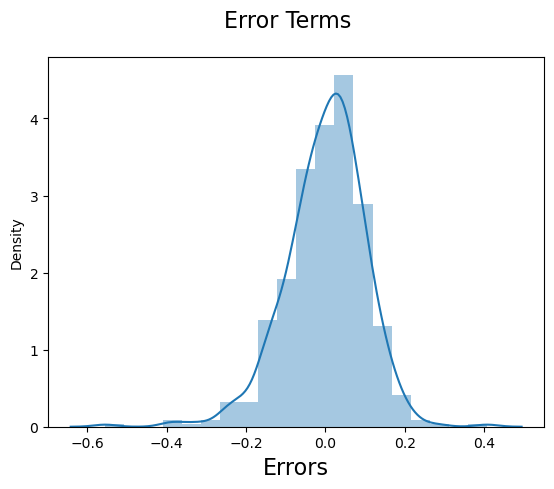

In [524]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residuals, bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Errors', fontsize = 16)                         # X-label
plt.show()

#### Observation:

Error terms are normally distributed.

### Error term VS Predicted Values

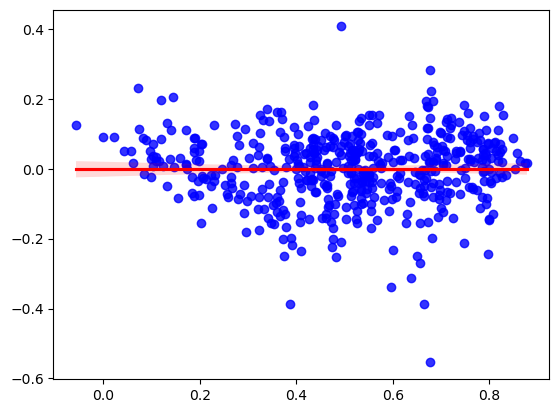

In [525]:
# Plotting the regplot for train_pred vs residuals
sns.regplot(x=y_train_pred, y=residuals, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.show()

### Making Predictions Using the Final Model

In [526]:
# Apply the scalling
# For test set only transform is requried.
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

# Let's check the test set after scalling
df_test.head()

,Year,Holiday,WorkingDay,Temperature,Humidity,WindSpeed,Count,Season_spring,Season_summer,Season_winter,...,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,"WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds","WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"
184,0.0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0.0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0.0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0.0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [527]:
# Crealting X and y test dataset from df_test dataset
y_test = df_test.pop('Count')
X_test = df_test

In [528]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping the insignificant variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_lm = sm.add_constant(X_test_new)

In [529]:
# Making predictions
y_pred = lm6.predict(X_test_lm)

In [530]:
# let's see the predicted values
y_pred

184    0.429630
535    0.768817
299    0.438503
221    0.527568
152    0.449168
         ...   
400    0.398116
702    0.665500
127    0.482270
640    0.738582
72     0.315673
Length: 219, dtype: float64

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

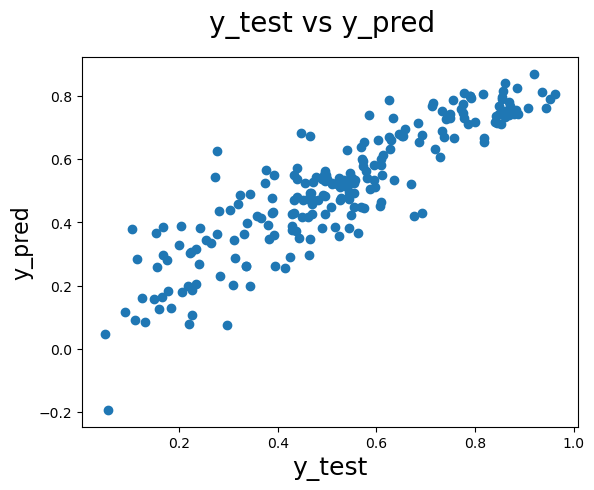

In [531]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label
plt.show()    

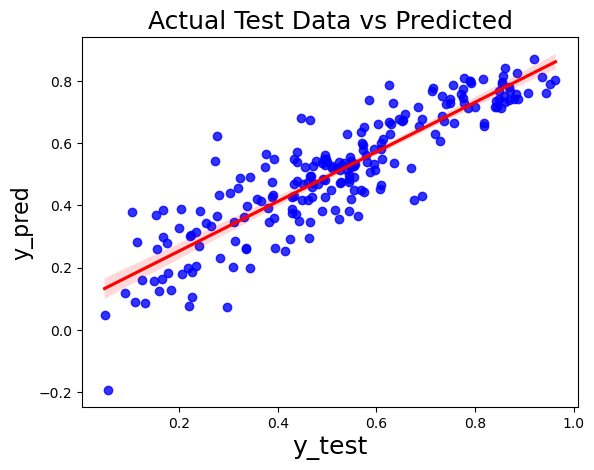

In [532]:
# Plotting y_test and y_pred using sns 
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.title('Actual Test Data vs Predicted', fontdict={'fontsize': 18}) # Heading
plt.show()

### RSquared-Score

R-squared score on the test set.

In [533]:
# let's caculate the r-squared 
r2_test = r2_score(y_test, y_pred)
r2_test

0.7832504527952753

#### Adjusted R Squaired on test set

In [534]:
# let's caculate the adjusted r-squared 
adj_r2 = round(
    1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1), 3)

print(adj_r2)

0.751


#### Equation for best fit line :

In [535]:
# Coefficent for the variables
round(lm6.params, 3)

const                                                                                                       0.536
Year                                                                                                        0.246
WorkingDay                                                                                                  0.057
WindSpeed                                                                                                  -0.193
Season_spring                                                                                              -0.238
Season_summer                                                                                              -0.040
Month_Dec                                                                                                  -0.119
Month_Jan                                                                                                  -0.123
Month_Nov                                                                               

### Outcome of the Analysis - 

**R-squared**:                       `0.798`<br>
**Adj. R-squared**:                  `0.793`<br>
**F-statistic**:                     `163.8`<br>
**Prob (F-statistic)**:          `5.41e-164`<br>
**R2_Score**:                         `0.78`<br>
**Adj. R-squared(Test Set)**:         `0.75`<br>


#### Equation - 

Count =  (<br>
`0.536`  <br>
\+ `0.246` * Year <br>
\+ `0.057` * WorkingDay <br>
\- `0.193` * WindSpeed  <br>
\- `0.238` * Season_spring <br>
\- `0.040` * Season_summer  <br>
\- `0.119` * Month_Dec <br>
\- `0.123` * Month_Jan <br>
\- `0.113` * Month_Nov <br>
\+ `0.056` * Month_Sep <br>
\+ `0.067` * Weekday_Saturday <br>
\- `0.321` * WeatherSituation_Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds <br>
\- `0.090` * WeatherSituation_Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)